In [ ]:
#Import MNIST(modified national institute of standards & technology database) Dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [ ]:
#Loading of Dataset (npz:numpy zip)
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape)

x_train shape is: (60000, 28, 28)
y_train shape is: (60000,)


In [ ]:
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_test shape is: (10000, 28, 28)
y_test shape is: (10000,)


In [ ]:
#1st image shape
x_train[1].shape

(28, 28)

In [ ]:
#1st Image (Greyscale)
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

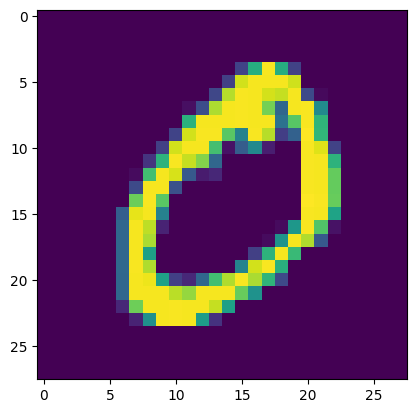

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [ ]:
y_train[1]

0

In [ ]:
#Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#Matrix(28*28) to Array
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

In [ ]:
x_train[1].shape

(784,)

In [ ]:
#One-Hot encoding for neuron activation
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Layers one after another
model = tf.keras.models.Sequential()
#Add layers in model
model.add(tf.keras.layers.InputLayer(input_shape = (784,)))
#128 neurons with relu
model.add(tf.keras.layers.Dense(128,activation='relu'))
#64 neurons with relu
model.add(tf.keras.layers.Dense(64,activation='relu'))
#10 neurons with softmax (multiclass classification: 0-9)
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()
#Param: (784*neurons+bias)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#stochastic gradient descend(minimize loss), loss=y-y'
model.compile(optimizer = 'sgd',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.3953 - accuracy: 0.8906
Epoch 2/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1939 - accuracy: 0.9441
Epoch 3/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1435 - accuracy: 0.9588
Epoch 4/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1142 - accuracy: 0.9673
Epoch 5/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0938 - accuracy: 0.9726
Epoch 6/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0794 - accuracy: 0.9769
Epoch 7/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0680 - accuracy: 0.9797
Epoch 8/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0589 - accuracy: 0.9824
Epoch 9/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0514 - accuracy: 0.9854
Epoch 10/10
6000/6000 [==============================] - 13s 2ms/step - l